In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
data = pd.read_csv("D:\Personnel Info\Public Health\Data-driven\Python\Health_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [24]:
import plotly.express as px
data = data
figure = px.histogram(data, x = "sex", color = "smoker", title= "Number of Smokers")
figure.show()

In [25]:
#It is important to use this feature while training a machine learning model, so now I will replace the values of the “sex” and “smoker” columns with 0 and 1 as both these columns contain string values:
data["sex"] = data["sex"].map({"female": 0, "male": 1})
data["smoker"] = data["smoker"].map({"no": 0, "yes": 1})
print(data.head())

   age  sex     bmi  children  smoker     region      charges
0   19    0  27.900         0       1  southwest  16884.92400
1   18    1  33.770         1       0  southeast   1725.55230
2   28    1  33.000         3       0  southeast   4449.46200
3   33    1  22.705         0       0  northwest  21984.47061
4   32    1  28.880         0       0  northwest   3866.85520


In [26]:
import plotly.express as px
pie = data["region"].value_counts()
regions = pie.index
population = pie.values
fig = px.pie(data, values=population, names=regions)
fig.show()

In [27]:
print(data.corr())

               age       sex       bmi  children    smoker   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000  0.787251
charges   0.299008  0.057292  0.198341  0.067998  0.787251  1.000000


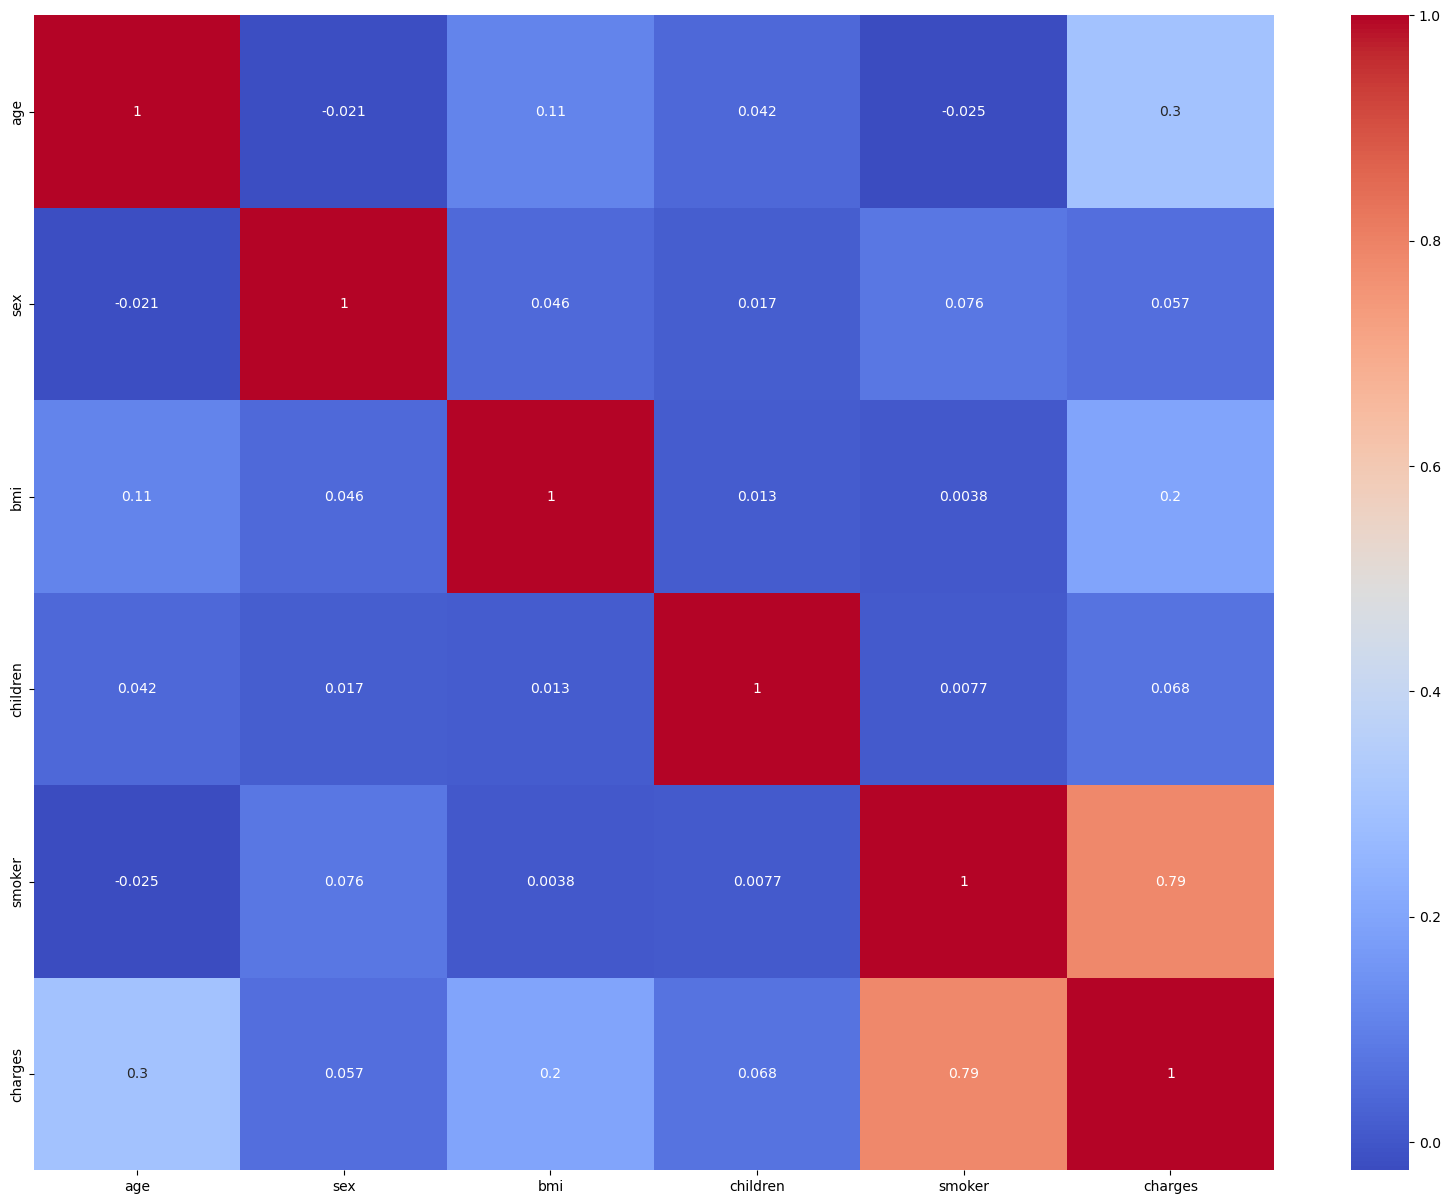

In [28]:
plt.figure(figsize=(20, 15))
correlations = data.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [29]:
x = np.array(data[["age", "sex", "bmi", "smoker"]])
y = np.array(data["charges"])

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(xtrain, ytrain)

RandomForestRegressor()

In [31]:
ypred = forest.predict(xtest)
data = pd.DataFrame(data={"Predicted Premium Amount": ypred})
print(data.head())

   Predicted Premium Amount
0              10581.718563
1               5467.429171
2              28274.373393
3               9556.734973
4              34654.472371
